# CE49X Lab 2: Is Wave Energy Worth the Investment?
## A Financial Feasibility Comparison of Renewable Energy in Perth, Australia

**Instructor:** Dr. Eyuphan Koc  
**Department of Civil Engineering, Bogazici University**  
**Semester:** Spring 2026

---

## Background

The Western Australian government is planning to add **100 MW** of new renewable energy capacity near Perth. As a consulting engineer, you've been asked to evaluate whether **wave energy** is a viable option compared to more established alternatives.

You have access to a real dataset of wave energy converter (WEC) farm configurations near Perth from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm). The dataset (`WEC_Perth_49.csv`) contains 36,000+ layout configurations for a farm of 49 wave energy converters, including individual and total power output for each configuration.

Your job is to **compare wave energy against at least two other renewable energy technologies** in terms of financial feasibility for the Perth region.

## Deliverables

Your notebook must include the following:

### 1. Wave Energy Analysis (from the dataset)
- Load and explore the `WEC_Perth_49.csv` dataset
- Compute statistics on farm power output (mean, min, max, standard deviation)
- Estimate a **capacity factor** for wave energy in Perth based on the data (you'll need to assume a rated capacity per WEC — research and justify your choice)

### 2. Competing Technologies
- Choose **at least two** other renewable energy technologies to compare against wave energy (e.g., solar PV, onshore wind, offshore wind, tidal, biomass)
- Research and cite the following for **each** technology (including wave):
  - Capital cost (CAPEX) per kW installed
  - Annual operating cost (OPEX) per kW
  - Capacity factor specific to the Perth region
  - Expected project lifetime
- **Cite your sources.** Use data from reputable organizations (e.g., IRENA, IEA, CSIRO, NREL, Lazard).

### 3. Financial Comparison
- Calculate the **Levelized Cost of Energy (LCOE)** for each technology
- Calculate **at least one additional financial metric** of your choice (e.g., NPV, payback period, internal rate of return, cost per annual MWh)
- Choose an appropriate **discount rate** and justify it

### 4. Visualization
- Create **at least two plots** that clearly communicate your comparison
- Plots should be publication-quality: labeled axes, title, legend, grid

### 5. Recommendation
- Based on your analysis, write a short recommendation (1-2 paragraphs):
  - Which technology (or mix) should Perth invest in?
  - Under what conditions could wave energy become competitive?
  - What factors does your financial model **not** capture?

## Hints

- **LCOE formula:**

$$\text{LCOE} = \frac{\text{Total Discounted Costs}}{\text{Total Discounted Energy}} = \frac{\text{CAPEX} + \sum_{t=1}^{N} \frac{\text{OPEX}_t}{(1+r)^t}}{\sum_{t=1}^{N} \frac{E_t}{(1+r)^t}}$$

  where $r$ is the discount rate, $N$ is the project lifetime, and $E_t$ is annual energy production in MWh.

- **Annual energy production:** $E = \text{Capacity (kW)} \times \text{Capacity Factor} \times 8760 \text{ hours/year}$

- The dataset gives power in **Watts**. Be careful with unit conversions.

- Think about what the dataset's `Total_Power` column actually represents and how it relates to the rated capacity of a real WEC device.

## Grading

| Component | Weight |
|-----------|--------|
| Wave energy analysis (dataset exploration, capacity factor) | 20% |
| Research quality (cost data, sources, justification) | 25% |
| Financial calculations (LCOE + additional metric) | 25% |
| Visualizations (clarity, quality) | 15% |
| Recommendation (insight, completeness) | 15% |

## Submission

1. Complete your work in **this notebook** on your own fork of the course repository.
2. Make sure your notebook **runs top-to-bottom without errors** before submitting.
3. Commit and push your completed notebook to your fork.
4. We will grade directly from your fork — there is no separate upload. Make sure your latest work is pushed before the deadline.

---
## Your Work Starts Here

Dataset: 36,043 rows × 149 columns
Each row = one farm layout configuration
Each configuration places 49 wave energy converters
count    36043.000000
mean         3.938246
std          0.122617
min          3.388944
25%          3.847335
50%          3.931541
75%          4.063623
max          4.177659
Name: Total_Power_MW, dtype: float64

--- Capacity Factor Estimation ---
Rated Capacity per WEC:   0.24 MW (240 kW)
Actual Mean per WEC:      0.080372 MW
Estimated Capacity Factor: 33.49%
Wave LCOE:        539.41 $/MWh
Solar PV LCOE (CF=32%): 46.74 $/MWh
Solar PV LCOE (CF=19%): 78.71 $/MWh
Offshore wind LCOE (CF=55%): 138.21 $/MWh


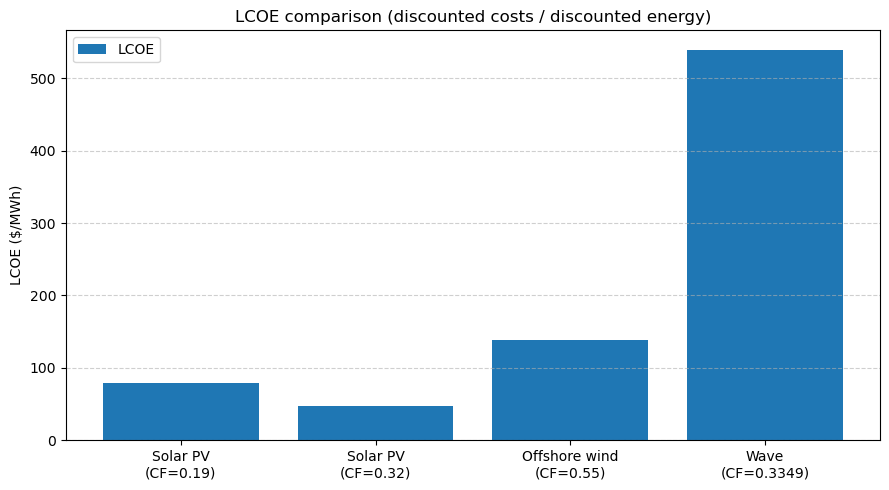

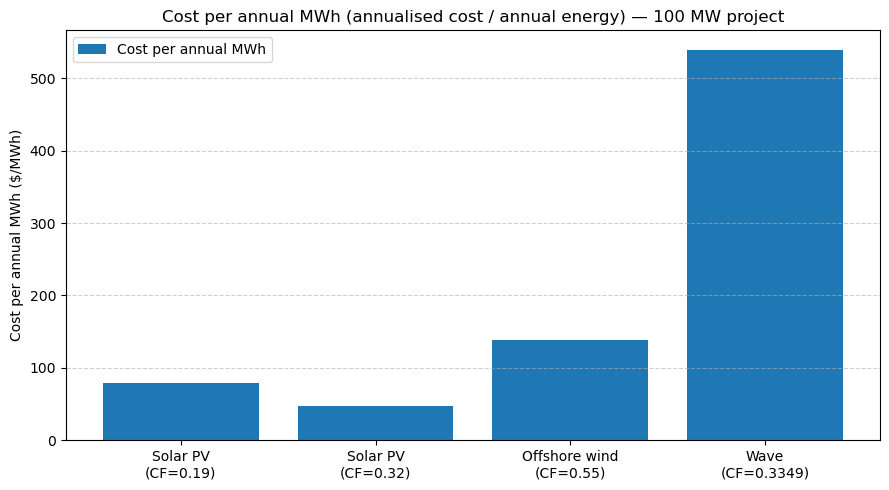


### Recommendation

Based on the PDF inputs and my wave capacity factor, utility-scale solar PV is the most financially viable option for adding 100 MW near Perth under these assumptions (lowest LCOE range and lowest annualised cost). Offshore wind is materially higher cost than solar PV in this comparison, but it offers a higher capacity factor range (GenCost), which can be valuable for energy yield and potential complementarity with solar output; however, on cost alone, it does not beat solar PV here.

Wave is not competitive on LCOE under current WSE assumptions (14,000 $/kW CAPEX and 3.02% annual O&M). However, the wave report projects significant cost reductions with learning and indicates wave could become cost-competitive with offshore wind after relatively small cumulative deployments (order of tens of MW under the report’s learning assumptions). The report also gives much lower projected CAPEX at higher cumulative installations (e.g., 3,676 $/kW at 100 MW cumulative and 1,022 $/kW at 1,000 MW cumulative). In practice, wave becomes more competitive if capital cost drops substantially, capacity factor improves, and financing risk (discount rate) falls as the technology matures (identified as key drivers in the wave report).

This simplified financial model does not capture: (i) Perth-specific CAPEX adjustments (GenCost notes its “current” CAPEX assumptions are based on sites within ~200 km of the Victorian metropolitan area), (ii) grid connection and transmission differences by technology/site, (iii) system value (timing of generation, correlation with demand, firming/integration needs), and (iv) first-of-a-kind (FOAK) / project-risk effects for technologies not yet built at scale in Australia.


In [39]:
#1. Wave Energy Analysis (from the dataset)
import numpy as np
import pandas as pd
df = pd.read_csv('WEC_Perth_49.csv')
print(f"Dataset: {df.shape[0]:,} rows \u00d7 {df.shape[1]} columns")
print(f"Each row = one farm layout configuration")
print(f"Each configuration places 49 wave energy converters")

# Create a new column 'Total_Power_MW' by dividing the 'Total_Power' column by 1,000,000
df['Total_Power_MW'] = df['Total_Power'] / 1_000_000

# statistics on farm power output mean, min, max, standard deviation
power_stats = df['Total_Power_MW'].describe()
print(power_stats)
#assuming rated capacity per WEC is 240 kW. I have chosen the CETO 5 unit by 
# Carnegie Clean Energy as the reference device. Because Carnegie is a Perth-based company, and the
#  CETO 5 was the specific technology deployed at the Perth Wave Energy Project off Garden Island. 

NUM_WECS = 49
RATED_POWER_KW = 240  # CETO 5 rated capacity
RATED_POWER_MW = RATED_POWER_KW / 1000  # Convert to MW (0.24 MW)

# 1. Get the mean total power of the whole farm from your data
mean_farm_power_mw = df['Total_Power_MW'].mean()

# 2. Calculate the mean power produced per single WEC
mean_per_wec_mw = mean_farm_power_mw / NUM_WECS

# 3. Calculate Capacity Factor (%)
# Formula: (Actual Average Power / Theoretical Max Power) * 100
capacity_factor = (mean_per_wec_mw / RATED_POWER_MW) * 100

print(f"\n--- Capacity Factor Estimation ---")
print(f"Rated Capacity per WEC:   {RATED_POWER_MW} MW ({RATED_POWER_KW} kW)")
print(f"Actual Mean per WEC:      {mean_per_wec_mw:.6f} MW")
print(f"Estimated Capacity Factor: {capacity_factor:.2f}%")

#REFERENCES : Perth Wave Energy Project ,
#  Offshore Wind Energy In Australia Final Project Report 2011
# Gencost 2023-2024 Final Report  CSIRO
# Wave Energy Cost Projections Australia's National Science Agency CSIRO

#2. Competing Technologies and Financial Comperasion

#wave energy
import numpy as np

def pv_factor_sum(r: float, N: int) -> float:
    """
    Sum of discount factors from t=1..N:
    A = Σ_{t=1..N} 1/(1+r)^t
    """
    t = np.arange(1, N + 1)
    return np.sum(1.0 / (1.0 + r) ** t)

def lcoe_discounted(
    capex_per_kw: float,
    opex_per_kw_yr: float,
    cf: float,
    r: float,
    life_years: int,
    construction_years: float = 0.0
) -> float:
    #LCOE = minimum cost per unit of energy a power plant must receive 
    # to break even over its lifetime. 
    # Cost per annual MWh=Annual energy (MWh/yr)/ Annualised cost ($/yr)​
    """
    LCOE = ( CAPEX + Σ OPEX_t/(1+r)^t ) / ( Σ E_t/(1+r)^t )

    Assumptions consistent with the PDFs you’re using:
    - OPEX is fixed each year (given as $/kW-yr or % of CAPEX).
    - Capacity factor is constant (so annual energy is constant).
    - CAPEX is treated as a one-time cost; for construction time, CAPEX is inflated
      by (1+r)^(construction_years) per the GenCost simplification.
    - Computed per 1 kW installed. Output is $/MWh.
    """
    # One-time CAPEX adjusted for construction time (GenCost-style)
    capex_adj = capex_per_kw * (1.0 + r) ** construction_years

    # Discounted sum factor for annual series
    A = pv_factor_sum(r, life_years)

    # Discounted OPEX stream ($/kW)
    pv_opex = opex_per_kw_yr * A

    # Annual energy per 1 kW installed:
    # 1 kW * 8760 h/yr * CF = (8760*CF) kWh/yr = (8.760*CF) MWh/yr
    annual_energy_mwh = 8.760 * cf

    # Discounted energy over life (MWh per kW)
    pv_energy = annual_energy_mwh * A

    return (capex_adj + pv_opex) / pv_energy


r = 0.0599  # 5.99%

# Wave (WSE assumptions + your Perth CF)
wave = {
    "capex_per_kw": 14000.0,
    "opex_per_kw_yr": 14000.0 * 0.0302,   # 3.02% of CAPEX
    "cf": 0.3349,                         # your dataset result
    "life_years": 25,
    "construction_years": 1.0
}

# Solar PV (GenCost)
solar_low = {  # CF high / low-cost case
    "capex_per_kw": 1526.0,
    "opex_per_kw_yr": 17.0,
    "cf": 0.32,
    "life_years": 30,
    "construction_years": 0.5
}
solar_high = {  # CF low / high-cost case
    "capex_per_kw": 1526.0,
    "opex_per_kw_yr": 17.0,
    "cf": 0.19,
    "life_years": 30,
    "construction_years": 0.5
}

# Offshore wind (fixed) (GenCost) — CF set to 55% per your instruction
offshore = {
    "capex_per_kw": 5545.0,
    "opex_per_kw_yr": 149.9,
    "cf": 0.55,              # UPDATED
    "life_years": 25,
    "construction_years": 3.0
}

# -----------------------
# Compute LCOE ($/MWh)
# -----------------------
lcoe_wave = lcoe_discounted(r=r, **wave)
lcoe_solar_low = lcoe_discounted(r=r, **solar_low)
lcoe_solar_high = lcoe_discounted(r=r, **solar_high)
lcoe_offshore = lcoe_discounted(r=r, **offshore)

print(f"Wave LCOE:        {lcoe_wave:,.2f} $/MWh")
print(f"Solar PV LCOE (CF=32%): {lcoe_solar_low:,.2f} $/MWh")
print(f"Solar PV LCOE (CF=19%): {lcoe_solar_high:,.2f} $/MWh")
print(f"Offshore wind LCOE (CF=55%): {lcoe_offshore:,.2f} $/MWh")
import numpy as np
import pandas as pd


def crf(r: float, N: int) -> float:
    """Capital Recovery Factor."""
    return (r * (1 + r) ** N) / ((1 + r) ** N - 1)

def capex_adjusted_for_construction(capex_per_kw: float, r: float, construction_years: float) -> float:
    """
    Simple interest-during-construction treatment:
    CAPEX_adj = CAPEX * (1+r)^(construction_years)
    """
    return capex_per_kw * (1 + r) ** construction_years

def annual_energy_mwh(capacity_mw: float, cf: float) -> float:
    """Annual energy in MWh/year."""
    return capacity_mw * 8760.0 * cf

def annualised_cost_usd_per_year(
    capex_per_kw: float,
    opex_per_kw_yr: float,
    r: float,
    life_years: int,
    construction_years: float,
    capacity_mw: float
) -> float:
    """
    Annualised cost ($/yr) = CRF * (CAPEX_adj_total) + (fixed OPEX total)
    Computed for a project of size capacity_mw.
    """
    capacity_kw = capacity_mw * 1000.0
    capex_adj_per_kw = capex_adjusted_for_construction(capex_per_kw, r, construction_years)
    capex_adj_total = capex_adj_per_kw * capacity_kw

    annualised_capex = crf(r, life_years) * capex_adj_total
    annual_opex = opex_per_kw_yr * capacity_kw
    return annualised_capex + annual_opex

def cost_per_annual_mwh_usd_per_mwh(
    capex_per_kw: float,
    opex_per_kw_yr: float,
    cf: float,
    r: float,
    life_years: int,
    construction_years: float,
    capacity_mw: float
) -> float:
    """
    Cost per annual MWh ($/MWh) = Annualised cost ($/yr) / Annual energy (MWh/yr)
    """
    cost_yr = annualised_cost_usd_per_year(
        capex_per_kw, opex_per_kw_yr, r, life_years, construction_years, capacity_mw
    )
    e_yr = annual_energy_mwh(capacity_mw, cf)
    if e_yr <= 0:
        raise ValueError("Annual energy is zero or negative. Check capacity factor.")
    return cost_yr / e_yr

# -----------------------------
# Inputs (edit if needed)
# -----------------------------
r = 0.0599          # discount rate
capacity_mw = 100.0 # project size

# Wave: OPEX rule = 3.02% of CAPEX (choose basis)
wave_capex = 14000.0
wave_opex_pct = 0.0302
wave_cf = 0.3349
wave_life = 25
wave_construction = 1.0

# Choose whether wave OPEX is % of "overnight" CAPEX or % of "CAPEX adjusted for construction"
wave_opex_basis = "overnight"  # change to "adjusted" if you want
if wave_opex_basis == "overnight":
    wave_opex = wave_capex * wave_opex_pct
elif wave_opex_basis == "adjusted":
    wave_opex = capex_adjusted_for_construction(wave_capex, r, wave_construction) * wave_opex_pct
else:
    raise ValueError("wave_opex_basis must be 'overnight' or 'adjusted'")

# Solar PV (two CF cases)
solar_capex = 1526.0
solar_opex = 17.0
solar_life = 30
solar_construction = 0.5
solar_cases = [
    ("Solar PV (CF=0.32)", 0.32),
    ("Solar PV (CF=0.19)", 0.19),
]

# Offshore wind (fixed) — CF set to 55% as you requested
off_capex = 5545.0
off_opex = 149.9
off_cf = 0.55
off_life = 25
off_construction = 3.0

# -----------------------------
# Compute metric for each technology
# -----------------------------
rows = []

# Wave
rows.append({
    "Technology": f"Wave (CF={wave_cf:.4f}, OPEX basis={wave_opex_basis})",
    "Annual energy (MWh/yr)": annual_energy_mwh(capacity_mw, wave_cf),
    "Annualised cost ($/yr)": annualised_cost_usd_per_year(wave_capex, wave_opex, r, wave_life, wave_construction, capacity_mw),
    "Cost per annual MWh ($/MWh)": cost_per_annual_mwh_usd_per_mwh(wave_capex, wave_opex, wave_cf, r, wave_life, wave_construction, capacity_mw),
})

# Solar PV cases
for name, cf in solar_cases:
    rows.append({
        "Technology": name,
        "Annual energy (MWh/yr)": annual_energy_mwh(capacity_mw, cf),
        "Annualised cost ($/yr)": annualised_cost_usd_per_year(solar_capex, solar_opex, r, solar_life, solar_construction, capacity_mw),
        "Cost per annual MWh ($/MWh)": cost_per_annual_mwh_usd_per_mwh(solar_capex, solar_opex, cf, r, solar_life, solar_construction, capacity_mw),
    })

# Offshore wind
rows.append({
    "Technology": f"Offshore wind fixed (CF={off_cf:.2f})",
    "Annual energy (MWh/yr)": annual_energy_mwh(capacity_mw, off_cf),
    "Annualised cost ($/yr)": annualised_cost_usd_per_year(off_capex, off_opex, r, off_life, off_construction, capacity_mw),
    "Cost per annual MWh ($/MWh)": cost_per_annual_mwh_usd_per_mwh(off_capex, off_opex, off_cf, r, off_life, off_construction, capacity_mw),
})

df = pd.DataFrame(rows)
df["Annual energy (MWh/yr)"] = df["Annual energy (MWh/yr)"].round(0).astype(int)
df["Annualised cost ($/yr)"] = df["Annualised cost ($/yr)"].round(0).astype(int)
df["Cost per annual MWh ($/MWh)"] = df["Cost per annual MWh ($/MWh)"].round(2)

df
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def pv_factor_sum(r: float, N: int) -> float:
    t = np.arange(1, N + 1)
    return np.sum(1.0 / (1.0 + r) ** t)

def lcoe_discounted(capex_per_kw, opex_per_kw_yr, cf, r, life_years, construction_years):
    # CAPEX timing (GenCost simplification): CAPEX_adj = CAPEX * (1+r)^construction_time
    capex_adj = capex_per_kw * (1.0 + r) ** construction_years

    A = pv_factor_sum(r, life_years)                 # Σ 1/(1+r)^t
    pv_opex = opex_per_kw_yr * A                     # Σ OPEX/(1+r)^t  (constant OPEX each year)

    annual_energy_mwh = 8.760 * cf                   # MWh per kW-year
    pv_energy = annual_energy_mwh * A                # Σ E/(1+r)^t

    return (capex_adj + pv_opex) / pv_energy         # $/MWh

def crf(r: float, N: int) -> float:
    return (r * (1 + r) ** N) / ((1 + r) ** N - 1)

def annual_energy_mwh(capacity_mw: float, cf: float) -> float:
    return capacity_mw * 8760.0 * cf

def annualised_cost(capex_per_kw, opex_per_kw_yr, r, life_years, construction_years, capacity_mw):
    capacity_kw = capacity_mw * 1000.0
    capex_adj_per_kw = capex_per_kw * (1 + r) ** construction_years
    capex_adj_total = capex_adj_per_kw * capacity_kw

    annualised_capex = crf(r, life_years) * capex_adj_total
    annual_opex = opex_per_kw_yr * capacity_kw
    return annualised_capex + annual_opex            # $/yr

def cost_per_annual_mwh(capex_per_kw, opex_per_kw_yr, cf, r, life_years, construction_years, capacity_mw):
    return annualised_cost(capex_per_kw, opex_per_kw_yr, r, life_years, construction_years, capacity_mw) / \
           annual_energy_mwh(capacity_mw, cf)

#Plots
r = 0.0599
capacity_mw = 100.0

# Wave
wave_capex = 14000.0
wave_opex = wave_capex * 0.0302   # 3.02% of CAPEX
wave_cf = 0.3349
wave_life = 25
wave_construction = 1.0

# Solar PV (two CF cases)
solar_capex = 1526.0
solar_opex = 17.0
solar_life = 30
solar_construction = 0.5
solar_cases = [("Solar PV", "CF=0.32", 0.32),
               ("Solar PV", "CF=0.19", 0.19)]

# Offshore wind (fixed) — CF=0.55 per your instruction
off_capex = 5545.0
off_opex = 149.9
off_cf = 0.55
off_life = 25
off_construction = 3.0

# -----------------------------
# Build results table
# -----------------------------
rows = []

# Wave
rows.append({
    "Technology": "Wave",
    "Case": "CF=0.3349",
    "LCOE ($/MWh)": lcoe_discounted(wave_capex, wave_opex, wave_cf, r, wave_life, wave_construction),
    "Cost per annual MWh ($/MWh)": cost_per_annual_mwh(wave_capex, wave_opex, wave_cf, r, wave_life, wave_construction, capacity_mw),
})

# Solar cases
for tech, case, cf in solar_cases:
    rows.append({
        "Technology": tech,
        "Case": case,
        "LCOE ($/MWh)": lcoe_discounted(solar_capex, solar_opex, cf, r, solar_life, solar_construction),
        "Cost per annual MWh ($/MWh)": cost_per_annual_mwh(solar_capex, solar_opex, cf, r, solar_life, solar_construction, capacity_mw),
    })

# Offshore
rows.append({
    "Technology": "Offshore wind",
    "Case": "CF=0.55",
    "LCOE ($/MWh)": lcoe_discounted(off_capex, off_opex, off_cf, r, off_life, off_construction),
    "Cost per annual MWh ($/MWh)": cost_per_annual_mwh(off_capex, off_opex, off_cf, r, off_life, off_construction, capacity_mw),
})

df = pd.DataFrame(rows)

# Nice ordering
order = ["Solar PV", "Offshore wind", "Wave"]
df["Technology"] = pd.Categorical(df["Technology"], categories=order, ordered=True)
df = df.sort_values(["Technology", "Case"]).reset_index(drop=True)

labels = [f"{t}\n({c})" for t, c in zip(df["Technology"], df["Case"])]

# -----------------------------
# Plot 1: LCOE comparison
# -----------------------------
plt.figure(figsize=(9, 5))
plt.bar(labels, df["LCOE ($/MWh)"], label="LCOE")
plt.ylabel("LCOE ($/MWh)")
plt.title("LCOE comparison (discounted costs / discounted energy)")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# Plot 2: Cost per annual MWh comparison
# -----------------------------
plt.figure(figsize=(9, 5))
plt.bar(labels, df["Cost per annual MWh ($/MWh)"], label="Cost per annual MWh")
plt.ylabel("Cost per annual MWh ($/MWh)")
plt.title("Cost per annual MWh (annualised cost / annual energy) — 100 MW project")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

df.round(2)
from IPython.display import Markdown, display

recommendation_md = r"""
### Recommendation

Based on the PDF inputs and my wave capacity factor, utility-scale solar PV is the most financially viable option for adding 100 MW near Perth under these assumptions (lowest LCOE range and lowest annualised cost). Offshore wind is materially higher cost than solar PV in this comparison, but it offers a higher capacity factor range (GenCost), which can be valuable for energy yield and potential complementarity with solar output; however, on cost alone, it does not beat solar PV here.

Wave is not competitive on LCOE under current WSE assumptions (14,000 $/kW CAPEX and 3.02% annual O&M). However, the wave report projects significant cost reductions with learning and indicates wave could become cost-competitive with offshore wind after relatively small cumulative deployments (order of tens of MW under the report’s learning assumptions). The report also gives much lower projected CAPEX at higher cumulative installations (e.g., 3,676 $/kW at 100 MW cumulative and 1,022 $/kW at 1,000 MW cumulative). In practice, wave becomes more competitive if capital cost drops substantially, capacity factor improves, and financing risk (discount rate) falls as the technology matures (identified as key drivers in the wave report).

This simplified financial model does not capture: (i) Perth-specific CAPEX adjustments (GenCost notes its “current” CAPEX assumptions are based on sites within ~200 km of the Victorian metropolitan area), (ii) grid connection and transmission differences by technology/site, (iii) system value (timing of generation, correlation with demand, firming/integration needs), and (iv) first-of-a-kind (FOAK) / project-risk effects for technologies not yet built at scale in Australia.
"""

display(Markdown(recommendation_md))

















---

### Questions?

**Dr. Eyuphan Koc**  
eyuphan.koc@bogazici.edu.tr